In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import re
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv('../data/clean/startup_data_clean2.csv')
df.head()

,state_code,city,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired
0,CA,San Diego,Bandsintown,1/1/2007,active,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,1
1,CA,Los Gatos,TriCipher,1/1/2000,active,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,1
2,CA,San Diego,Plixi,3/18/2009,active,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,1
3,CA,Cupertino,Solidcore Systems,1/1/2002,active,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,1
4,CA,San Francisco,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0


In [4]:
def fix_closed(x):
    if x.startswith('a'):
        return 'active'
    else:
        return 'notactive'

df['closed_at'] = df['closed_at'].apply(fix_closed)

In [5]:
def success_or_not(df):
    df1=df.copy()
    
    if (((df1['is_top500']==1)|(df1['is_acquired']==1)) & (df1['closed_at']=="active")):
        return 1
    elif (((df1['is_top500']==0) & (df1['is_acquired']==0)) | (df1['closed_at']=="notactive")):
        return 0

In [6]:
df['success'] = df.apply(success_or_not,axis=1)

In [7]:
df['success'].value_counts()

1    588
0    335
Name: success, dtype: int64

In [8]:
df_num = df.select_dtypes(include=[np.number])
df_cat = df.select_dtypes(exclude=[np.number])

In [9]:
y=df_num['success']
X=df_num.drop(['success'], axis=1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [11]:
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (738, 32)
Shape of the y Train : (738,)
Shape of the X test : (185, 32)
Shape of the y test : (185,)


In [12]:
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

In [13]:
y_train_res.value_counts()

1    467
0    467
Name: success, dtype: int64

In [14]:
X_train_num = X_train_res.select_dtypes(include = np.number)

# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)

In [15]:
X_train_transformed = X_train_norm

In [16]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial')

classification.fit(X_train_transformed, y_train_res)

LogisticRegression(multi_class='multinomial', random_state=0)

In [17]:
y_test_pred = classification.predict(X_test)

from sklearn.metrics import accuracy_score

In [19]:
Logistic_Regression_classification_accuracy= classification.score(X_test, y_test) # Accuracy for classification models and R2 for regression mnodels
Logistic_Regression_classification_accuracy

0.654054054054054

In [20]:
confusion_matrix(y_test, y_test_pred)

array([[  0,  64],
       [  0, 121]], dtype=int64)

In [21]:
cohen_kappa_score(y_test, y_test_pred)

0.0

In [22]:
regr = DecisionTreeRegressor(max_depth=10,
                             criterion = 'squared_error',
                             min_samples_split=2,
                             min_samples_leaf = 1,
                             max_features = 6)
regr.fit(X_train_transformed, y_train_res)


DecisionTreeRegressor(max_depth=10, max_features=6)

In [23]:
y_pred_dt_te = regr.predict(X_test)

In [24]:
y_pred_dt_tr = regr.predict(X_train)

In [25]:
print("The R2 for the Decision Tree (fp) in the TRAIN set is {:.2f}".format(regr.score(X_train_transformed, y_train_res)))
print("The R2 for the Decision Tree (fp) in the TEST  set is {:.2f}".format(regr.score(X_test, y_pred_dt_te)))

The R2 for the Decision Tree (fp) in the TRAIN set is 0.72
The R2 for the Decision Tree (fp) in the TEST  set is 1.00


In [26]:
cross_val_scores1 = cross_val_score(regr, X_train_transformed, y_train_res, cv=10)
print("The mean R2 of the folds was {:.2f}".format(np.mean(cross_val_scores1)))

The mean R2 of the folds was 0.78


In [27]:
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0) 
classifier.fit(X_train_transformed,y_train_res)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [28]:
y_pred_dt2_te = classifier.predict(X_test)

In [29]:
y_pred_dt2_tr = classifier.predict(X_train)

In [30]:
cm_dt2 = confusion_matrix(y_test, y_pred_dt2_te)
cm_dt2

array([[ 63,   1],
       [  0, 121]], dtype=int64)

In [31]:
print("Train data R2 was: {:.2f}".format(classifier.score(X_train_transformed, y_train_res)))
print("Test data R2 was: {:.2f}".format(classifier.score(X_test, y_pred_dt2_te)))
#This is weird, I am not sure why it is showing 1 in both here.

Train data R2 was: 1.00
Test data R2 was: 1.00


In [32]:
cross_val_scores2 = cross_val_score(classifier, X_train_transformed, y_train_res, cv=10)
print("The mean R2 of the folds was {:.2f}".format(np.mean(cross_val_scores2)))

The mean R2 of the folds was 0.99


In [33]:
print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_dt2_te)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_dt2_te)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_dt2_te)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_dt2_te)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_dt2_te)))

The accuracy in the TEST set is: 0.99
The precision in the TEST set is: 0.99
The recall in the TEST set is: 1.00
The F1 in the TEST set is: 1.00
The Kappa in the TEST set is: 0.99


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 42)
clf.fit(X_train_transformed, y_train_res)

print("The R2 for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train_transformed, y_train_res)))
print("The R2 for the Random Forest in the TEST  set is {:.2f}".format(clf.score(X_test, y_test)))

The R2 for the Random Forest in the TRAIN set is 0.99
The R2 for the Random Forest in the TEST  set is 0.99


1    121
0     64
Name: success, dtype: int64

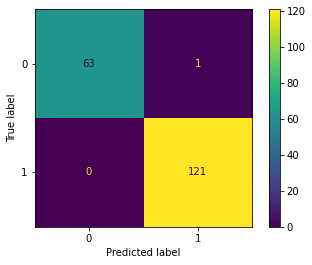

In [35]:
y_pred_rf = clf.predict(X_test)
display(y_test.value_counts())
cm_rf=confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot()
plt.show()

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score


print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_rf)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_rf)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_rf)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_rf)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_rf)))

The accuracy in the TEST set is: 0.99
The precision in the TEST set is: 0.99
The recall in the TEST set is: 1.00
The F1 in the TEST set is: 1.00
The Kappa in the TEST set is: 0.99


In [37]:
random_forest_accuracy=accuracy_score(y_test,y_pred_rf)
random_forest_accuracy

0.9945945945945946

In [38]:
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8)

# Train the model on training data
clf.fit(X_train_transformed, y_train_res)

cross_val_scores = cross_val_score(clf, X_train_transformed, y_train_res, cv=10)

print("The mean R2 of the folds was {:.2f}".format(np.mean(cross_val_scores)))

The mean R2 of the folds was 0.98


In [39]:
prediction = clf.predict(X_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
print(mse)
print(rmse)

0.005405405405405406
0.07352146220938077


In [40]:
importances = list(zip(clf.feature_importances_.tolist(), X_train_transformed.columns.tolist()))
importances.sort(reverse=True)
display (importances)

[(0.5680049926208054, 'is_acquired'),
 (0.11650870257799362, 'relationships'),
 (0.05511040770684206, 'age_last_milestone_year'),
 (0.04968400866085164, 'milestones'),
 (0.04019597262344031, 'avg_participants'),
 (0.03436295558184926, 'is_top500'),
 (0.027593173782852455, 'funding_total_usd'),
 (0.026740031571742113, 'age_first_milestone_year'),
 (0.02239473611311858, 'age_last_funding_year'),
 (0.01829831176738508, 'age_first_funding_year'),
 (0.014222858039050835, 'funding_rounds'),
 (0.005603809057497998, 'has_roundA'),
 (0.004049565189127974, 'is_otherstate'),
 (0.0039010904793860806, 'has_roundB'),
 (0.003735194966663356, 'has_VC'),
 (0.002188307761372024, 'is_othercategory'),
 (0.0013698247602752511, 'is_CA'),
 (0.0013086381819890115, 'is_software'),
 (0.0012605927653575335, 'has_roundD'),
 (0.0011476059407455935, 'has_angel'),
 (0.0009436285345517574, 'has_roundC'),
 (0.0008035989253645852, 'is_web'),
 (0.00034883826602127805, 'is_NY'),
 (0.00012196942436318722, 'is_MA'),
 (0.00

Text(0.5, 1.0, 'feature importance score')

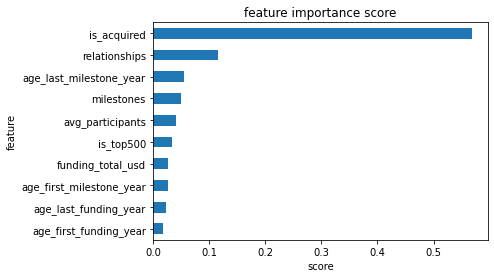

In [41]:
importances = pd.Series(clf.feature_importances_, index=X.columns)
ax = importances.nlargest(10).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

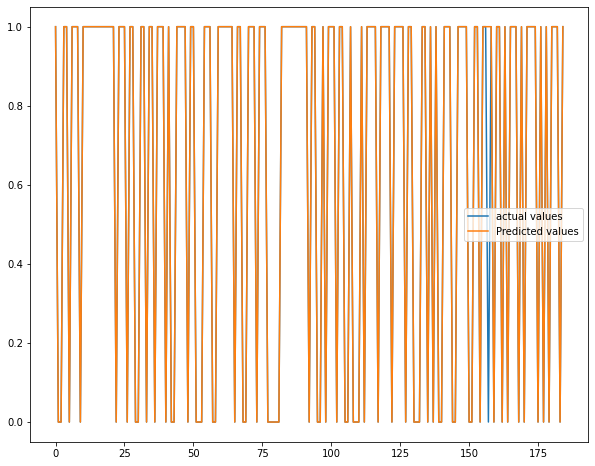

In [42]:
# Random Forest
plt.figure(figsize=(10, 8))
# plotting the graphs
plt.plot([i for i in range(len(y_test))],y_test, label="actual values")
plt.plot([i for i in range(len(y_test))],y_pred_rf, label="Predicted values")
# showing the plotting
plt.legend()
plt.show()

In [43]:
y_test

272    1
201    0
609    0
449    1
646    1
      ..
836    1
10     1
716    1
345    0
769    1
Name: success, Length: 185, dtype: int64